**`Introduction to TensorFlow 2.0 - Tensors, AutoGraph, Decorator and Keras API `**


In [3]:
# 1-D Tensor Object of integer type from a python list.
import tensorflow as tf
tf.constant([10, 22, 43, 34,6],dtype=tf.int32)

<tf.Tensor 'Const_2:0' shape=(5,) dtype=int32>

In [2]:
# 2-D Tensor Object of float type from a python list.
tf.constant([[10, 22, 43, 34,6], [23,10,34,55,8]],dtype=tf.float32)

<tf.Tensor 'Const_1:0' shape=(2, 5) dtype=float32>

In [4]:
import tensorflow as tf
#print current version of TensorFlow
print("Running Version-",tf.__version__)
#TensorFlow 1.x version for Hello World
var=tf.constant("Hello, World")
mysession = tf.Session()
print(mysession.run(var)) 

Running Version- 1.15.0
b'Hello, World'


In [5]:
!pip install --upgrade tensorflow
import tensorflow as tf
#print current version of TensorFlow
print("Running Version-",tf.__version__)
#TensorFlow 2.x version for Hello World
var=tf.constant("Hello, World")
tf.print(var)

     |████████████████████████████████| 421.8MB 34kB/s 
     |████████████████████████████████| 3.9MB 29.4MB/s 
     |████████████████████████████████| 450kB 49.7MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


Running Version- 1.15.0


<tf.Operation 'PrintV2' type=PrintV2>

In [2]:
from math import pi
import tensorflow as tf
@tf.function
def getarea(rad):
  area=pi*rad** 2
  return area
tf.print("Area of Circle=",getarea(3)) 

Area of Circle= 28.274334


In [4]:
import tensorflow as tf
@tf.function
def gettableof(num):
  for i in range(1,11):
   tf.print(i*num, end=" ")

gettableof(2) 

2 4 6 8 10 12 14 16 18 20 

In [6]:
import tensorflow as tf
#function-declaration
@tf.function
def evenodd(num):
  if num%2==0:
     tf.print("Its Even Number")
  else:
     tf.print("Its Odd Number")
#call-to-function
evenodd(17)

Its Odd Number


In [7]:
import tensorflow as tf
#function-declaration
@tf.function
def evenodd(num):
    if num%2==0:
       tf.print("Its Even Number")
    else:
       tf.print("Its Odd Number")
#call-to-function
evenodd(17)
# AutoGraph- Normal python to graph code generation
print(tf.autograph.to_code(evenodd.python_function))

Its Odd Number
def tf__evenodd(num):
  with ag__.FunctionScope('evenodd', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:

    def get_state():
      return ()

    def set_state(_):
      pass

    def if_true():
      ag__.converted_call(tf.print, ('Its Even Number',), None, fscope)
      return ag__.match_staging_level(1, cond)

    def if_false():
      ag__.converted_call(tf.print, ('Its Odd Number',), None, fscope)
      return ag__.match_staging_level(1, cond)
    cond = num % 2 == 0
    ag__.if_stmt(cond, if_true, if_false, get_state, set_state, (), ())



**Practical Implementation of Artificial Neural Network with TensorFlow 2.0**

In [8]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [10]:
import tensorflow as tf
auto_dataset = tf.keras.utils.get_file("uci-mileage.data","http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
print(auto_dataset)

32768/30286 [================================] - 0s 4us/step
/root/.keras/datasets/uci-mileage.data


In [11]:
import pandas as pd
attribute_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration', 'Model Year', 'Origin']
first_df = pd.read_csv(auto_dataset, names=attribute_names,delimiter=" ", skipinitialspace=True, comment="\t")

#generate a copy a dataset
working_data = first_df.copy()

#print last 8 records from a dataset - from tail-side
working_data.tail(8)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
390,32.0,4,144.0,96.00,2665.0,13.9,82,3
391,36.0,4,135.0,84.00,2370.0,13.0,82,1
392,27.0,4,151.0,90.00,2950.0,17.3,82,1
393,27.0,4,140.0,86.00,2790.0,15.6,82,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,2
395,32.0,4,135.0,84.00,2295.0,11.6,82,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,1
397,31.0,4,119.0,82.00,2720.0,19.4,82,1


In [12]:
working_data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [13]:
working_data['Origin'] = working_data['Origin'].map(lambda x:{1: 'USA', 2: 'Europe', 3: 'Japan'}.get(x))
origin_data=pd.get_dummies(working_data.Origin, prefix='',prefix_sep='')
working_data= working_data.drop('Origin', axis=1)
working_data=working_data.join(origin_data)
working_data.tail(8)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
390,32.0,4,144.0,96.00,2665.0,13.9,82,0,1,0
391,36.0,4,135.0,84.00,2370.0,13.0,82,0,0,1
392,27.0,4,151.0,90.00,2950.0,17.3,82,0,0,1
393,27.0,4,140.0,86.00,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.00,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.00,2720.0,19.4,82,0,0,1


In [14]:
working_data.corr()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,Europe,Japan,USA
MPG,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.259022,0.442174,-0.568192
Cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.352861,-0.396479,0.604351
Displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.373886,-0.433505,0.651407
Weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.298843,-0.440817,0.598398
Acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.204473,0.109144,-0.250806
Model Year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,-0.024489,0.193101,-0.139883
Europe,0.259022,-0.352861,-0.373886,-0.298843,0.204473,-0.024489,1.000000,-0.229895,-0.597198
Japan,0.442174,-0.396479,-0.433505,-0.440817,0.109144,0.193101,-0.229895,1.000000,-0.643317
USA,-0.568192,0.604351,0.651407,0.598398,-0.250806,-0.139883,-0.597198,-0.643317,1.000000


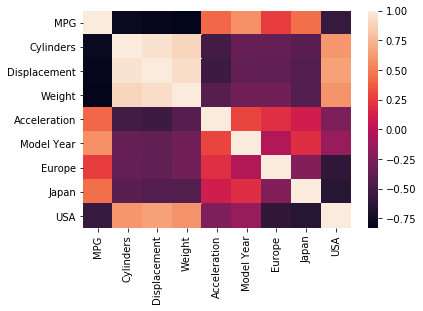

In [15]:
#correlation heatmap with Seaborn
import seaborn as sns
sns.heatmap(working_data.corr())

In [16]:
working_data=working_data[['MPG','Cylinders','Displacement','Weight']]
print(working_data)


      MPG  Cylinders  Displacement  Weight
0    18.0          8         307.0  3504.0
1    15.0          8         350.0  3693.0
2    18.0          8         318.0  3436.0
3    16.0          8         304.0  3433.0
4    17.0          8         302.0  3449.0
..    ...        ...           ...     ...
393  27.0          4         140.0  2790.0
394  44.0          4          97.0  2130.0
395  32.0          4         135.0  2295.0
396  28.0          4         120.0  2625.0
397  31.0          4         119.0  2720.0

[398 rows x 4 columns]


In [17]:
train_data=working_data.sample(frac=0.8,random_state=0)
test_data = working_data.drop(train_data.index)
print(train_data.head())
print(test_data.head())

      MPG  Cylinders  Displacement  Weight
65   14.0          8         351.0  4129.0
132  25.0          4         140.0  2542.0
74   13.0          8         302.0  4294.0
78   21.0          4         120.0  2979.0
37   18.0          6         232.0  3288.0
     MPG  Cylinders  Displacement  Weight
9   15.0          8         390.0  3850.0
25  10.0          8         360.0  4615.0
28   9.0          8         304.0  4732.0
31  25.0          4         113.0  2228.0
32  25.0          4          98.0  2046.0


In [18]:
#summary statistics
train_summary_stats = train_data.describe()
train_summary_stats.pop("MPG")
train_summary_stats=train_summary_stats.transpose()
print(train_summary_stats)

              count         mean         std  ...     50%      75%     max
Cylinders     318.0     5.427673    1.682941  ...     4.0     6.00     8.0
Displacement  318.0   193.061321  103.812742  ...   151.0   259.50   455.0
Weight        318.0  2963.823899  844.749805  ...  2792.5  3571.25  5140.0

[3 rows x 8 columns]


In [19]:
print("Shape of Train Dataset(rows,cols)-",train_data.shape)
print("Shape of Test Dataset(rows,cols)-",test_data.shape)

Shape of Train Dataset(rows,cols)- (318, 4)
Shape of Test Dataset(rows,cols)- (80, 4)


In [0]:
train_target= train_data.pop('MPG')
test_target = test_data.pop('MPG')

In [0]:
def normalize(t):
  return ((t)-train_summary_stats['mean'])/train_summary_stats['std']
  
normal_train_data=normalize(train_data)
normal_test_data=normalize(test_data)

In [22]:
normal_train_data

,Cylinders,Displacement,Weight
65,1.528471,1.521380,1.379315
132,-0.848320,-0.511125,-0.499348
74,1.528471,1.049377,1.574639
78,-0.848320,-0.703780,0.017965
37,0.340075,0.375086,0.383754
...,...,...,...
207,-0.848320,-0.607453,0.220392
279,-0.848320,-0.915700,-0.981147
227,0.340075,0.307657,0.788608
148,-0.848320,-0.742311,-0.849747


In [23]:
normal_test_data

,Cylinders,Displacement,Weight
9,1.528471,1.897057,1.049040
25,1.528471,1.608075,1.954633
28,1.528471,1.068642,2.093136
31,-0.848320,-0.771209,-0.871055
32,-0.848320,-0.915700,-1.086504
...,...,...,...
368,-0.848320,-0.780842,-0.383337
370,-0.848320,-0.780842,-0.460283
382,-0.848320,-0.819373,-0.850931
384,-0.848320,-0.983129,-1.182390


In [24]:
test_data.isna().sum()

Cylinders       0
Displacement    0
Weight          0
dtype: int64

In [0]:
import tensorflow as tf
from tensorflow.keras import layers
input_shape_model = len(normal_train_data.keys())
nn_model=tf.keras.Sequential([layers.Dense(64,activation='relu',input_shape=[input_shape_model]),layers.Dense(64, activation='relu'),layers.Dense(1)])
optimizer = tf.keras.optimizers.RMSprop(0.001)
nn_model.compile(loss='mse',optimizer=optimizer,metrics=['mae', 'mse'])


In [26]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________


In [27]:
no_epochs = 1000
ready = nn_model.fit(normal_train_data,train_target,epochs=no_epochs, validation_split = 0.2)

Train on 254 samples, validate on 64 samples
Epoch 1/1000
254/254 [==============================] - 1s 2ms/sample - loss: 606.7819 - mae: 23.2844 - mse: 606.7819 - val_loss: 587.7435 - val_mae: 23.0013 - val_mse: 587.7435
Epoch 2/1000
254/254 [==============================] - 0s 112us/sample - loss: 566.6764 - mae: 22.3525 - mse: 566.6765 - val_loss: 551.7025 - val_mae: 22.1539 - val_mse: 551.7025
Epoch 3/1000
254/254 [==============================] - 0s 89us/sample - loss: 530.1992 - mae: 21.4317 - mse: 530.1993 - val_loss: 515.3454 - val_mae: 21.2301 - val_mse: 515.3453
Epoch 4/1000
254/254 [==============================] - 0s 101us/sample - loss: 493.1114 - mae: 20.4183 - mse: 493.1114 - val_loss: 477.3735 - val_mae: 20.2027 - val_mse: 477.3735
Epoch 5/1000
254/254 [==============================] - 0s 107us/sample - loss: 453.8413 - mae: 19.2790 - mse: 453.8413 - val_loss: 436.1531 - val_mae: 19.0365 - val_mse: 436.1531
Epoch 6/1000
254/254 [==============================] - 0s

In [0]:
ready_log = pd.DataFrame(ready.history)

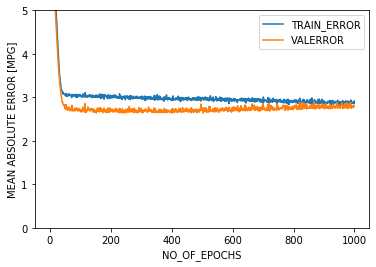

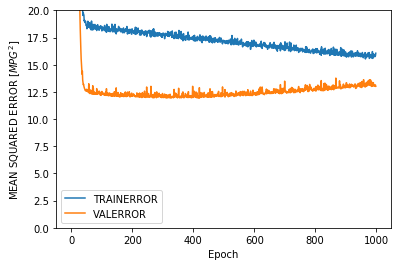

In [30]:
import matplotlib.pyplot as plt
ready_log['epoch']=ready.epoch
plt.figure()
plt.xlabel('NO_OF_EPOCHS')
plt.ylabel('MEAN ABSOLUTE ERROR [MPG]')
plt.plot(ready_log['epoch'],
ready_log['mae'],label='TRAIN_ERROR')
plt.plot(ready_log['epoch'], ready_log['val_mae'],label = 'VALERROR')
plt.ylim([0,5])
plt.legend()
plt.savefig('Mean Abs Error.png')
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('MEAN SQUARED ERROR [$MPG^2$]')
plt.plot(ready_log['epoch'], ready_log['mse'],label='TRAINERROR')
plt.plot(ready_log['epoch'], ready_log['val_mse'],label = 'VALERROR')
plt.ylim([0,20])
plt.legend()
plt.show()